In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
sns.set()
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import precision_score,classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier


# Analysis on Wine data set

In [46]:
wines = pd.read_csv('winequality-red.csv', sep=';')

In [47]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [48]:
wines.shape

(1599, 12)

Wine data set contains 1599 rows with 12 columns each representing various attributes of wine like fixed acidity, volatile acidity, citric acid etc... The response variable "quality" contains 6 levels (3,4,5,6,7,8).

In [49]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can obtain various statistics of the attributes using describe() function. We can observe that the maximum density of wines is 1.00 while minimum density is 0.99. Maximum fixed acidity is 15.9 while minimum value is 8.3

In [50]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Using the function info(), we can observe that the data types of all the predictors is float while the response variable quality is and integer type. Moreover, the data set does not contain any null values.

## Handling Duplicte Records 

In [51]:
wines.duplicated().sum()

240

Wine data set contains 240 duplicate records and those duplicate records can be removed/dropped using the function drop_duplicates( ).

In [52]:
duplicate_records = wines[wines.duplicated()]

In [53]:
duplicate_records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


In [54]:
wines.drop_duplicates(inplace=True)

In [55]:
wines.duplicated().sum()

0

In [56]:
wines.shape

(1359, 12)

After removing the duplicate records, the data set contains 1359 rows.

## Handling Missing Data

In [57]:
percent_missing = wines.isnull().sum() * 100 / len(wines)
missing_value_df = pd.DataFrame({'column_name': wines.columns,
                                 'percent_missing': percent_missing})

In [58]:
missing_value_df

,column_name,percent_missing
fixed acidity,fixed acidity,0.0
volatile acidity,volatile acidity,0.0
citric acid,citric acid,0.0
residual sugar,residual sugar,0.0
chlorides,chlorides,0.0
free sulfur dioxide,free sulfur dioxide,0.0
total sulfur dioxide,total sulfur dioxide,0.0
density,density,0.0
pH,pH,0.0
sulphates,sulphates,0.0


Null values in the data are found using isnull() and we can clearly observe that the data set does not contain any nulls.

## Correlation between variables

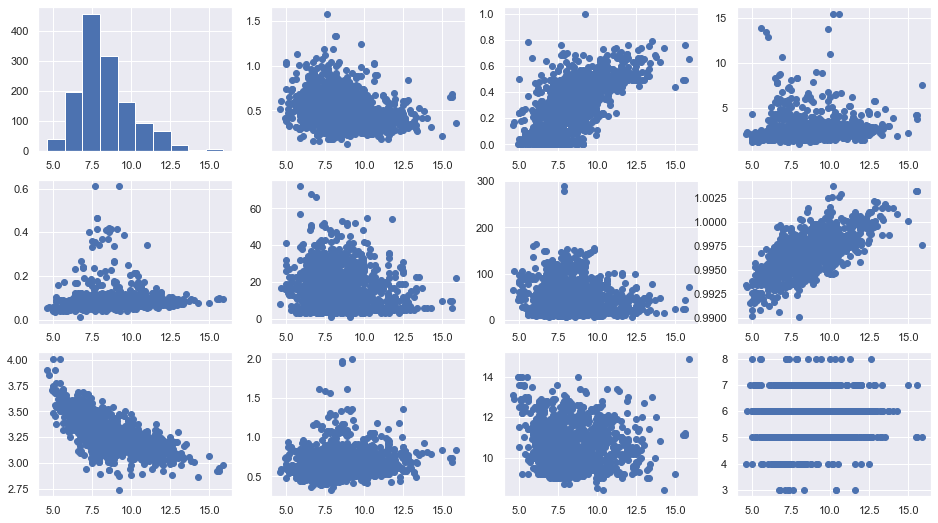

In [59]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.hist(wines['fixed acidity'])
ax2.scatter(wines['fixed acidity'], wines['volatile acidity'])
ax3.scatter(wines['fixed acidity'], wines['citric acid'])
ax4.scatter(wines['fixed acidity'], wines['residual sugar'])
ax5.scatter(wines['fixed acidity'], wines['chlorides'])
ax6.scatter(wines['fixed acidity'], wines['free sulfur dioxide'])
ax7.scatter(wines['fixed acidity'], wines['total sulfur dioxide'])
ax8.scatter(wines['fixed acidity'], wines['density'])
ax9.scatter(wines['fixed acidity'], wines['pH'])
ax10.scatter(wines['fixed acidity'], wines['sulphates'])
ax11.scatter(wines['fixed acidity'], wines['alcohol'])
ax12.scatter(wines['fixed acidity'], wines['quality'])


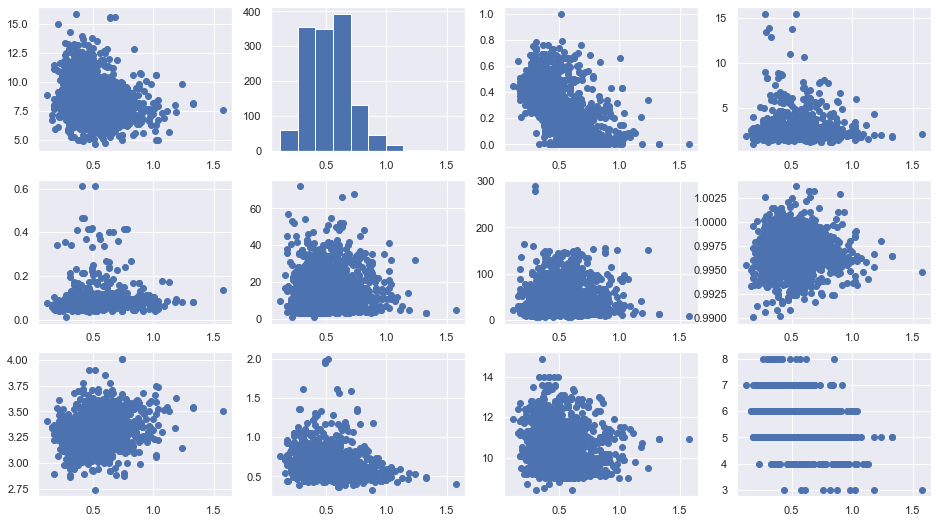

In [60]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['volatile acidity'], wines['fixed acidity'])
ax2.hist(wines['volatile acidity'])
ax3.scatter(wines['volatile acidity'], wines['citric acid'])
ax4.scatter(wines['volatile acidity'], wines['residual sugar'])
ax5.scatter(wines['volatile acidity'], wines['chlorides'])
ax6.scatter(wines['volatile acidity'], wines['free sulfur dioxide'])
ax7.scatter(wines['volatile acidity'], wines['total sulfur dioxide'])
ax8.scatter(wines['volatile acidity'], wines['density'])
ax9.scatter(wines['volatile acidity'], wines['pH'])
ax10.scatter(wines['volatile acidity'], wines['sulphates'])
ax11.scatter(wines['volatile acidity'], wines['alcohol'])
ax12.scatter(wines['volatile acidity'], wines['quality'])

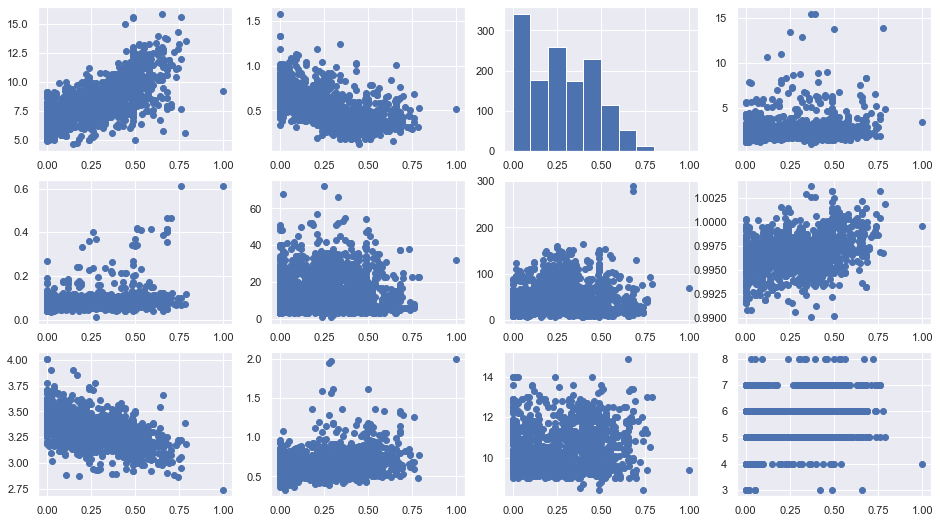

In [61]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['citric acid'], wines['fixed acidity'])
ax2.scatter(wines['citric acid'], wines['volatile acidity'])
ax3.hist(wines['citric acid'])
ax4.scatter(wines['citric acid'], wines['residual sugar'])
ax5.scatter(wines['citric acid'], wines['chlorides'])
ax6.scatter(wines['citric acid'], wines['free sulfur dioxide'])
ax7.scatter(wines['citric acid'], wines['total sulfur dioxide'])
ax8.scatter(wines['citric acid'], wines['density'])
ax9.scatter(wines['citric acid'], wines['pH'])
ax10.scatter(wines['citric acid'], wines['sulphates'])
ax11.scatter(wines['citric acid'], wines['alcohol'])
ax12.scatter(wines['citric acid'], wines['quality'])

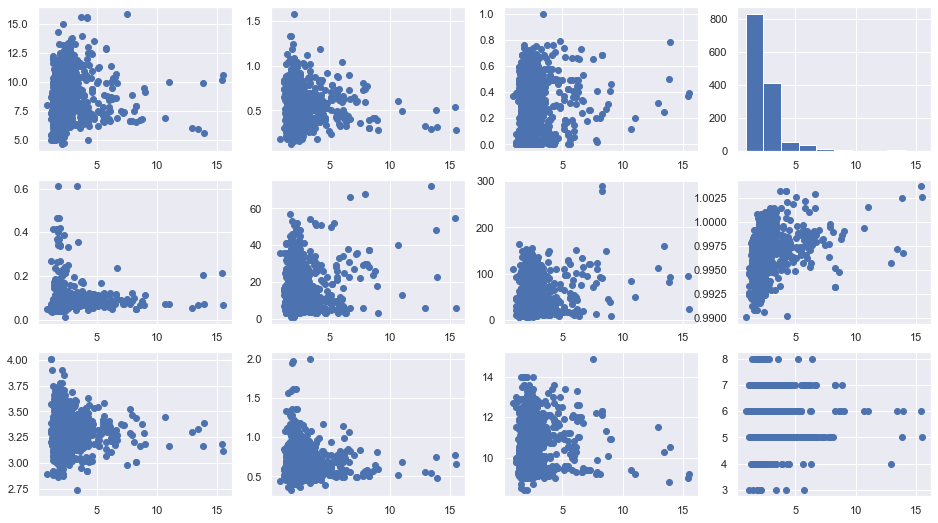

In [62]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['residual sugar'], wines['fixed acidity'])
ax2.scatter(wines['residual sugar'], wines['volatile acidity'])
ax3.scatter(wines['residual sugar'], wines['citric acid'])
ax4.hist(wines['residual sugar'])
ax5.scatter(wines['residual sugar'], wines['chlorides'])
ax6.scatter(wines['residual sugar'], wines['free sulfur dioxide'])
ax7.scatter(wines['residual sugar'], wines['total sulfur dioxide'])
ax8.scatter(wines['residual sugar'], wines['density'])
ax9.scatter(wines['residual sugar'], wines['pH'])
ax10.scatter(wines['residual sugar'], wines['sulphates'])
ax11.scatter(wines['residual sugar'], wines['alcohol'])
ax12.scatter(wines['residual sugar'], wines['quality'])

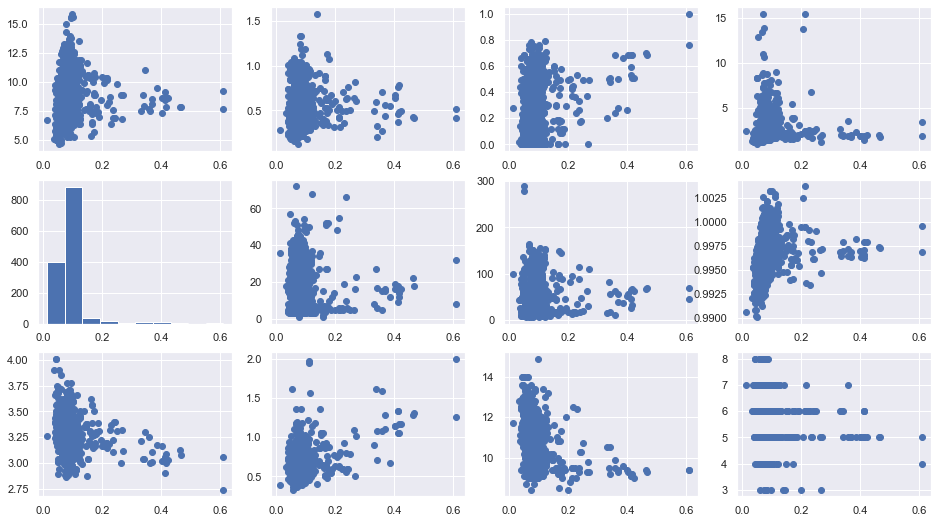

In [63]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['chlorides'], wines['fixed acidity'])
ax2.scatter(wines['chlorides'], wines['volatile acidity'])
ax3.scatter(wines['chlorides'], wines['citric acid'])
ax4.scatter(wines['chlorides'], wines['residual sugar'])
ax5.hist(wines['chlorides'])
ax6.scatter(wines['chlorides'], wines['free sulfur dioxide'])
ax7.scatter(wines['chlorides'], wines['total sulfur dioxide'])
ax8.scatter(wines['chlorides'], wines['density'])
ax9.scatter(wines['chlorides'], wines['pH'])
ax10.scatter(wines['chlorides'], wines['sulphates'])
ax11.scatter(wines['chlorides'], wines['alcohol'])
ax12.scatter(wines['chlorides'], wines['quality'])

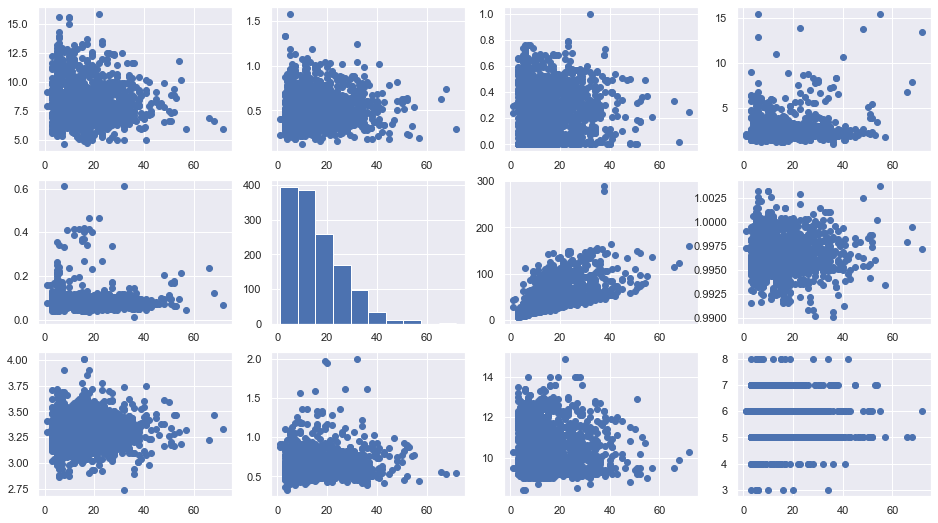

In [64]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['free sulfur dioxide'], wines['fixed acidity'])
ax2.scatter(wines['free sulfur dioxide'], wines['volatile acidity'])
ax3.scatter(wines['free sulfur dioxide'], wines['citric acid'])
ax4.scatter(wines['free sulfur dioxide'], wines['residual sugar'])
ax5.scatter(wines['free sulfur dioxide'], wines['chlorides'])
ax6.hist(wines['free sulfur dioxide'])
ax7.scatter(wines['free sulfur dioxide'], wines['total sulfur dioxide'])
ax8.scatter(wines['free sulfur dioxide'], wines['density'])
ax9.scatter(wines['free sulfur dioxide'], wines['pH'])
ax10.scatter(wines['free sulfur dioxide'], wines['sulphates'])
ax11.scatter(wines['free sulfur dioxide'], wines['alcohol'])
ax12.scatter(wines['free sulfur dioxide'], wines['quality'])

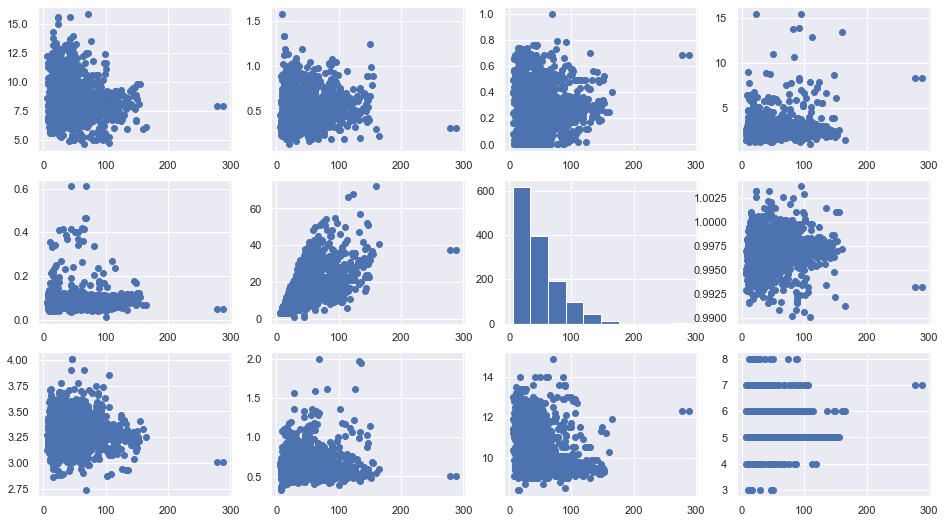

In [65]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['total sulfur dioxide'], wines['fixed acidity'])
ax2.scatter(wines['total sulfur dioxide'], wines['volatile acidity'])
ax3.scatter(wines['total sulfur dioxide'], wines['citric acid'])
ax4.scatter(wines['total sulfur dioxide'], wines['residual sugar'])
ax5.scatter(wines['total sulfur dioxide'], wines['chlorides'])
ax6.scatter(wines['total sulfur dioxide'], wines['free sulfur dioxide'])
ax7.hist(wines['total sulfur dioxide'])
ax8.scatter(wines['total sulfur dioxide'], wines['density'])
ax9.scatter(wines['total sulfur dioxide'], wines['pH'])
ax10.scatter(wines['total sulfur dioxide'], wines['sulphates'])
ax11.scatter(wines['total sulfur dioxide'], wines['alcohol'])
ax12.scatter(wines['total sulfur dioxide'], wines['quality'])

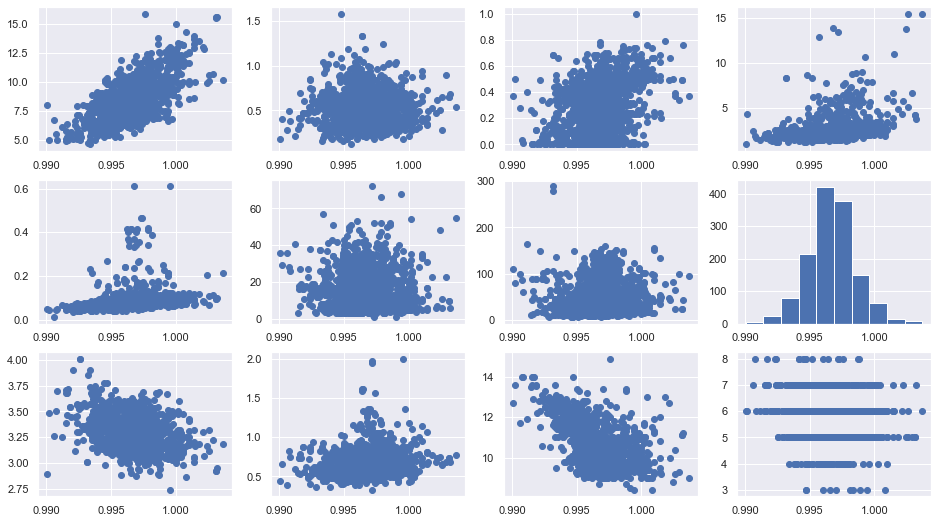

In [66]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['density'], wines['fixed acidity'])
ax2.scatter(wines['density'], wines['volatile acidity'])
ax3.scatter(wines['density'], wines['citric acid'])
ax4.scatter(wines['density'], wines['residual sugar'])
ax5.scatter(wines['density'], wines['chlorides'])
ax6.scatter(wines['density'], wines['free sulfur dioxide'])
ax7.scatter(wines['density'], wines['total sulfur dioxide'])
ax8.hist(wines['density'])
ax9.scatter(wines['density'], wines['pH'])
ax10.scatter(wines['density'], wines['sulphates'])
ax11.scatter(wines['density'], wines['alcohol'])
ax12.scatter(wines['density'], wines['quality'])

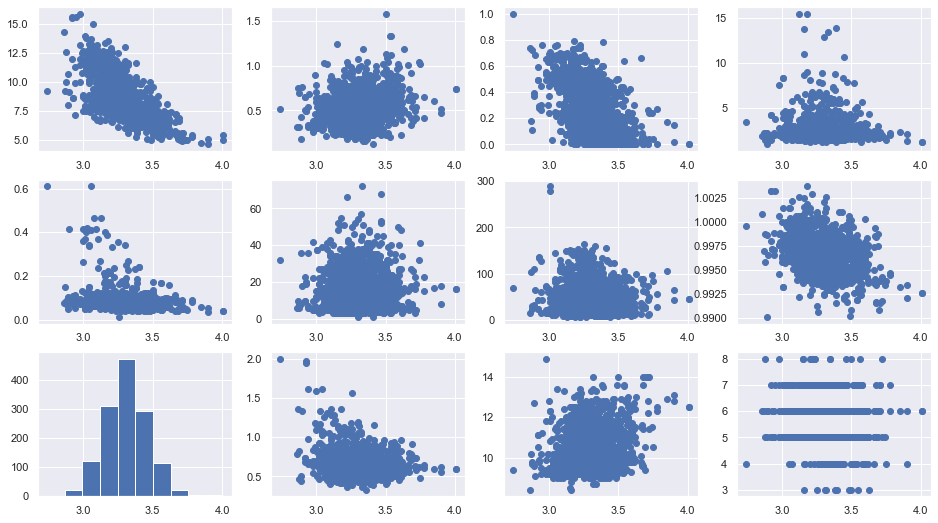

In [67]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['pH'], wines['fixed acidity'])
ax2.scatter(wines['pH'], wines['volatile acidity'])
ax3.scatter(wines['pH'], wines['citric acid'])
ax4.scatter(wines['pH'], wines['residual sugar'])
ax5.scatter(wines['pH'], wines['chlorides'])
ax6.scatter(wines['pH'], wines['free sulfur dioxide'])
ax7.scatter(wines['pH'], wines['total sulfur dioxide'])
ax8.scatter(wines['pH'], wines['density'])
ax9.hist(wines['pH'])
ax10.scatter(wines['pH'], wines['sulphates'])
ax11.scatter(wines['pH'], wines['alcohol'])
ax12.scatter(wines['pH'], wines['quality'])

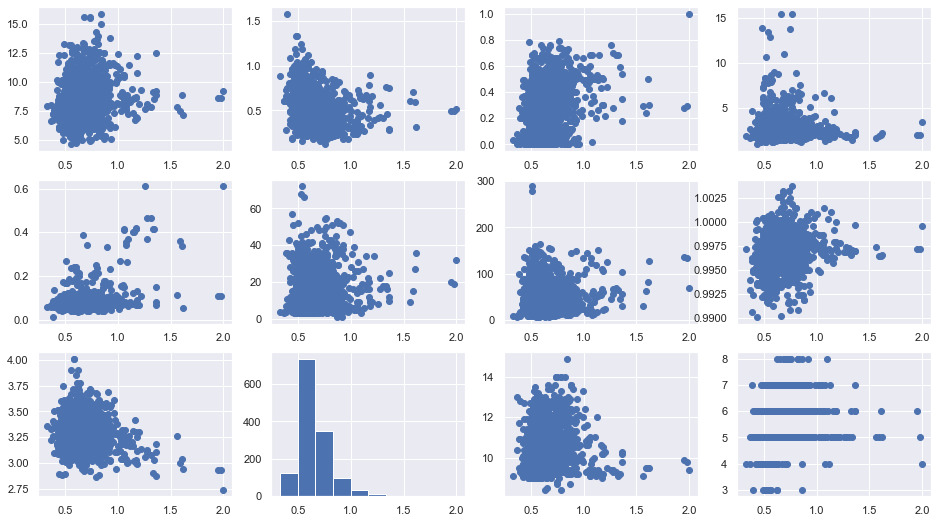

In [68]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['sulphates'], wines['fixed acidity'])
ax2.scatter(wines['sulphates'], wines['volatile acidity'])
ax3.scatter(wines['sulphates'], wines['citric acid'])
ax4.scatter(wines['sulphates'], wines['residual sugar'])
ax5.scatter(wines['sulphates'], wines['chlorides'])
ax6.scatter(wines['sulphates'], wines['free sulfur dioxide'])
ax7.scatter(wines['sulphates'], wines['total sulfur dioxide'])
ax8.scatter(wines['sulphates'], wines['density'])
ax9.scatter(wines['sulphates'], wines['pH'])
ax10.hist(wines['sulphates'])
ax11.scatter(wines['sulphates'], wines['alcohol'])
ax12.scatter(wines['sulphates'], wines['quality'])

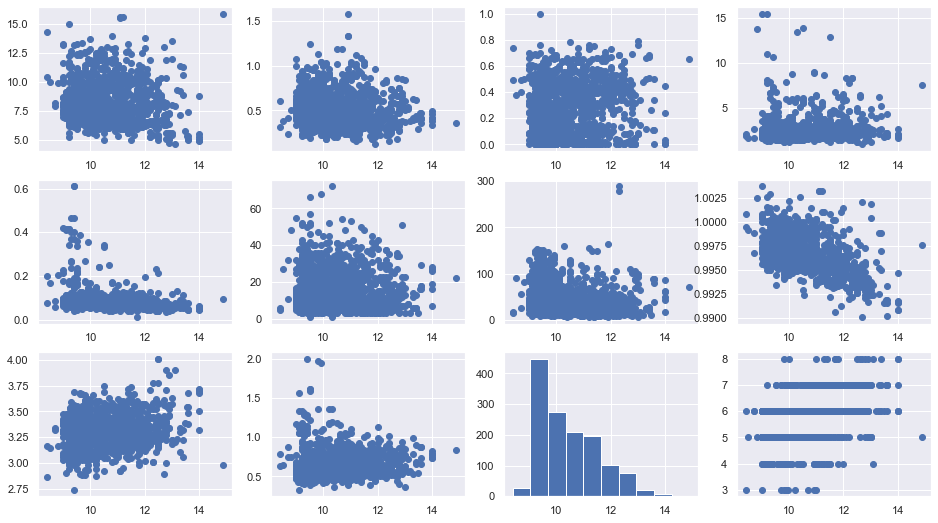

In [69]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['alcohol'], wines['fixed acidity'])
ax2.scatter(wines['alcohol'], wines['volatile acidity'])
ax3.scatter(wines['alcohol'], wines['citric acid'])
ax4.scatter(wines['alcohol'], wines['residual sugar'])
ax5.scatter(wines['alcohol'], wines['chlorides'])
ax6.scatter(wines['alcohol'], wines['free sulfur dioxide'])
ax7.scatter(wines['alcohol'], wines['total sulfur dioxide'])
ax8.scatter(wines['alcohol'], wines['density'])
ax9.scatter(wines['alcohol'], wines['pH'])
ax10.scatter(wines['alcohol'], wines['sulphates'])
ax11.hist(wines['alcohol'])
ax12.scatter(wines['alcohol'], wines['quality'])

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

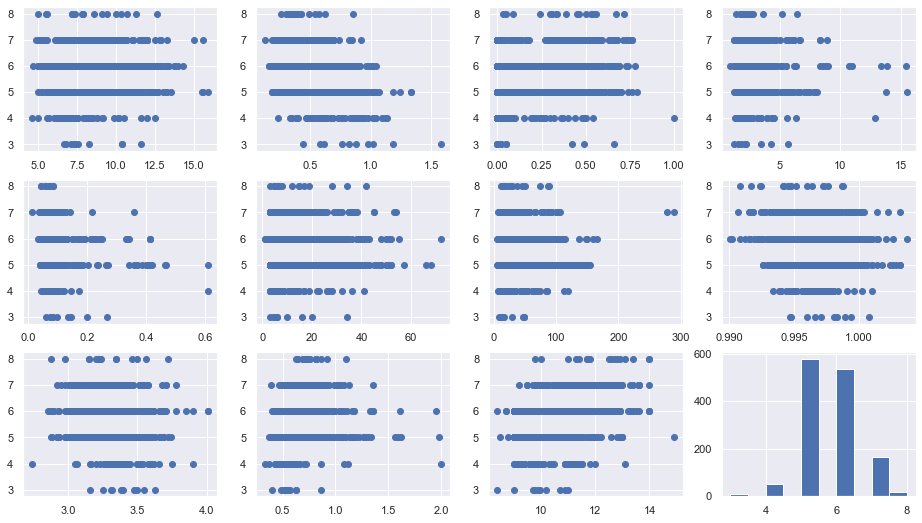

In [70]:
fig,((ax1,ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3,4, figsize=(16,9))

ax1.scatter(wines['fixed acidity'], wines['quality'])
ax2.scatter(wines['volatile acidity'], wines['quality'])
ax3.scatter(wines['citric acid'], wines['quality'])
ax4.scatter(wines['residual sugar'], wines['quality'])
ax5.scatter(wines['chlorides'], wines['quality'])
ax6.scatter(wines['free sulfur dioxide'], wines['quality'])
ax7.scatter(wines['total sulfur dioxide'], wines['quality'])
ax8.scatter(wines['density'], wines['quality'])
ax9.scatter(wines['pH'], wines['quality'])
ax10.scatter(wines['sulphates'], wines['quality'])
ax11.scatter(wines['alcohol'], wines['quality'])
ax12.hist(wines['quality'])

The correlation between attributes is calculated using the function corr().

In [71]:
wines_corr = wines.corr()
round(wines_corr, 2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.14,-0.10,0.67,-0.69,0.19,-0.06,0.12
volatile acidity,-0.26,1.00,-0.55,-0.00,0.06,-0.02,0.07,0.02,0.25,-0.26,-0.20,-0.40
citric acid,0.67,-0.55,1.00,0.14,0.21,-0.05,0.05,0.36,-0.55,0.33,0.11,0.23
residual sugar,0.11,-0.00,0.14,1.00,0.03,0.16,0.20,0.32,-0.08,-0.01,0.06,0.01
chlorides,0.09,0.06,0.21,0.03,1.00,0.00,0.05,0.19,-0.27,0.39,-0.22,-0.13
free sulfur dioxide,-0.14,-0.02,-0.05,0.16,0.00,1.00,0.67,-0.02,0.06,0.05,-0.08,-0.05
total sulfur dioxide,-0.10,0.07,0.05,0.20,0.05,0.67,1.00,0.08,-0.08,0.04,-0.22,-0.18
density,0.67,0.02,0.36,0.32,0.19,-0.02,0.08,1.00,-0.36,0.15,-0.50,-0.18
pH,-0.69,0.25,-0.55,-0.08,-0.27,0.06,-0.08,-0.36,1.00,-0.21,0.21,-0.06
sulphates,0.19,-0.26,0.33,-0.01,0.39,0.05,0.04,0.15,-0.21,1.00,0.09,0.25


In [72]:
wines.skew().sort_values(ascending = False)

chlorides               5.502487
residual sugar          4.548153
sulphates               2.406505
total sulfur dioxide    1.540368
free sulfur dioxide     1.226579
fixed acidity           0.941041
alcohol                 0.859841
volatile acidity        0.729279
citric acid             0.312726
pH                      0.232032
quality                 0.192407
density                 0.044778
dtype: float64

From the histograms and correlation matrix, we can clearly observe that there is skewness in the data set. To remove/handle skeweness in the data, we have performed log transformation to the attributes ('chlorides','residual sugar','sulphates','total sulfur dioxide','free sulfur dioxide') whose skewness is greater than 1. 

In [73]:
new_wine = wines.copy()

In [74]:
log_columns = ['chlorides','residual sugar','sulphates','total sulfur dioxide','free sulfur dioxide']
for value in log_columns:
    new_wine[value] = np.log10(wines[value])
new_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.278754,-1.119186,1.041393,1.531479,0.9978,3.51,-0.251812,9.4,5
1,7.8,0.88,0.00,0.414973,-1.008774,1.397940,1.826075,0.9968,3.20,-0.167491,9.8,5
2,7.8,0.76,0.04,0.361728,-1.036212,1.176091,1.732394,0.9970,3.26,-0.187087,9.8,5
3,11.2,0.28,0.56,0.278754,-1.124939,1.230449,1.778151,0.9980,3.16,-0.236572,9.8,6
5,7.4,0.66,0.00,0.255273,-1.124939,1.113943,1.602060,0.9978,3.51,-0.251812,9.4,5


In [75]:
new_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.278754,-1.119186,1.041393,1.531479,0.9978,3.51,-0.251812,9.4,5
1,7.8,0.88,0.00,0.414973,-1.008774,1.397940,1.826075,0.9968,3.20,-0.167491,9.8,5
2,7.8,0.76,0.04,0.361728,-1.036212,1.176091,1.732394,0.9970,3.26,-0.187087,9.8,5
3,11.2,0.28,0.56,0.278754,-1.124939,1.230449,1.778151,0.9980,3.16,-0.236572,9.8,6
5,7.4,0.66,0.00,0.255273,-1.124939,1.113943,1.602060,0.9978,3.51,-0.251812,9.4,5


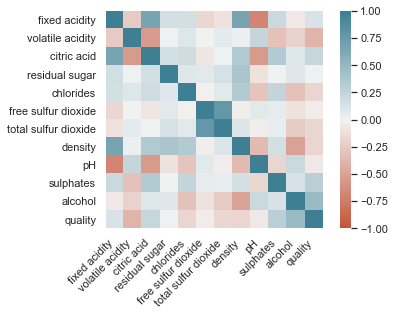

In [76]:
corr = new_wine.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

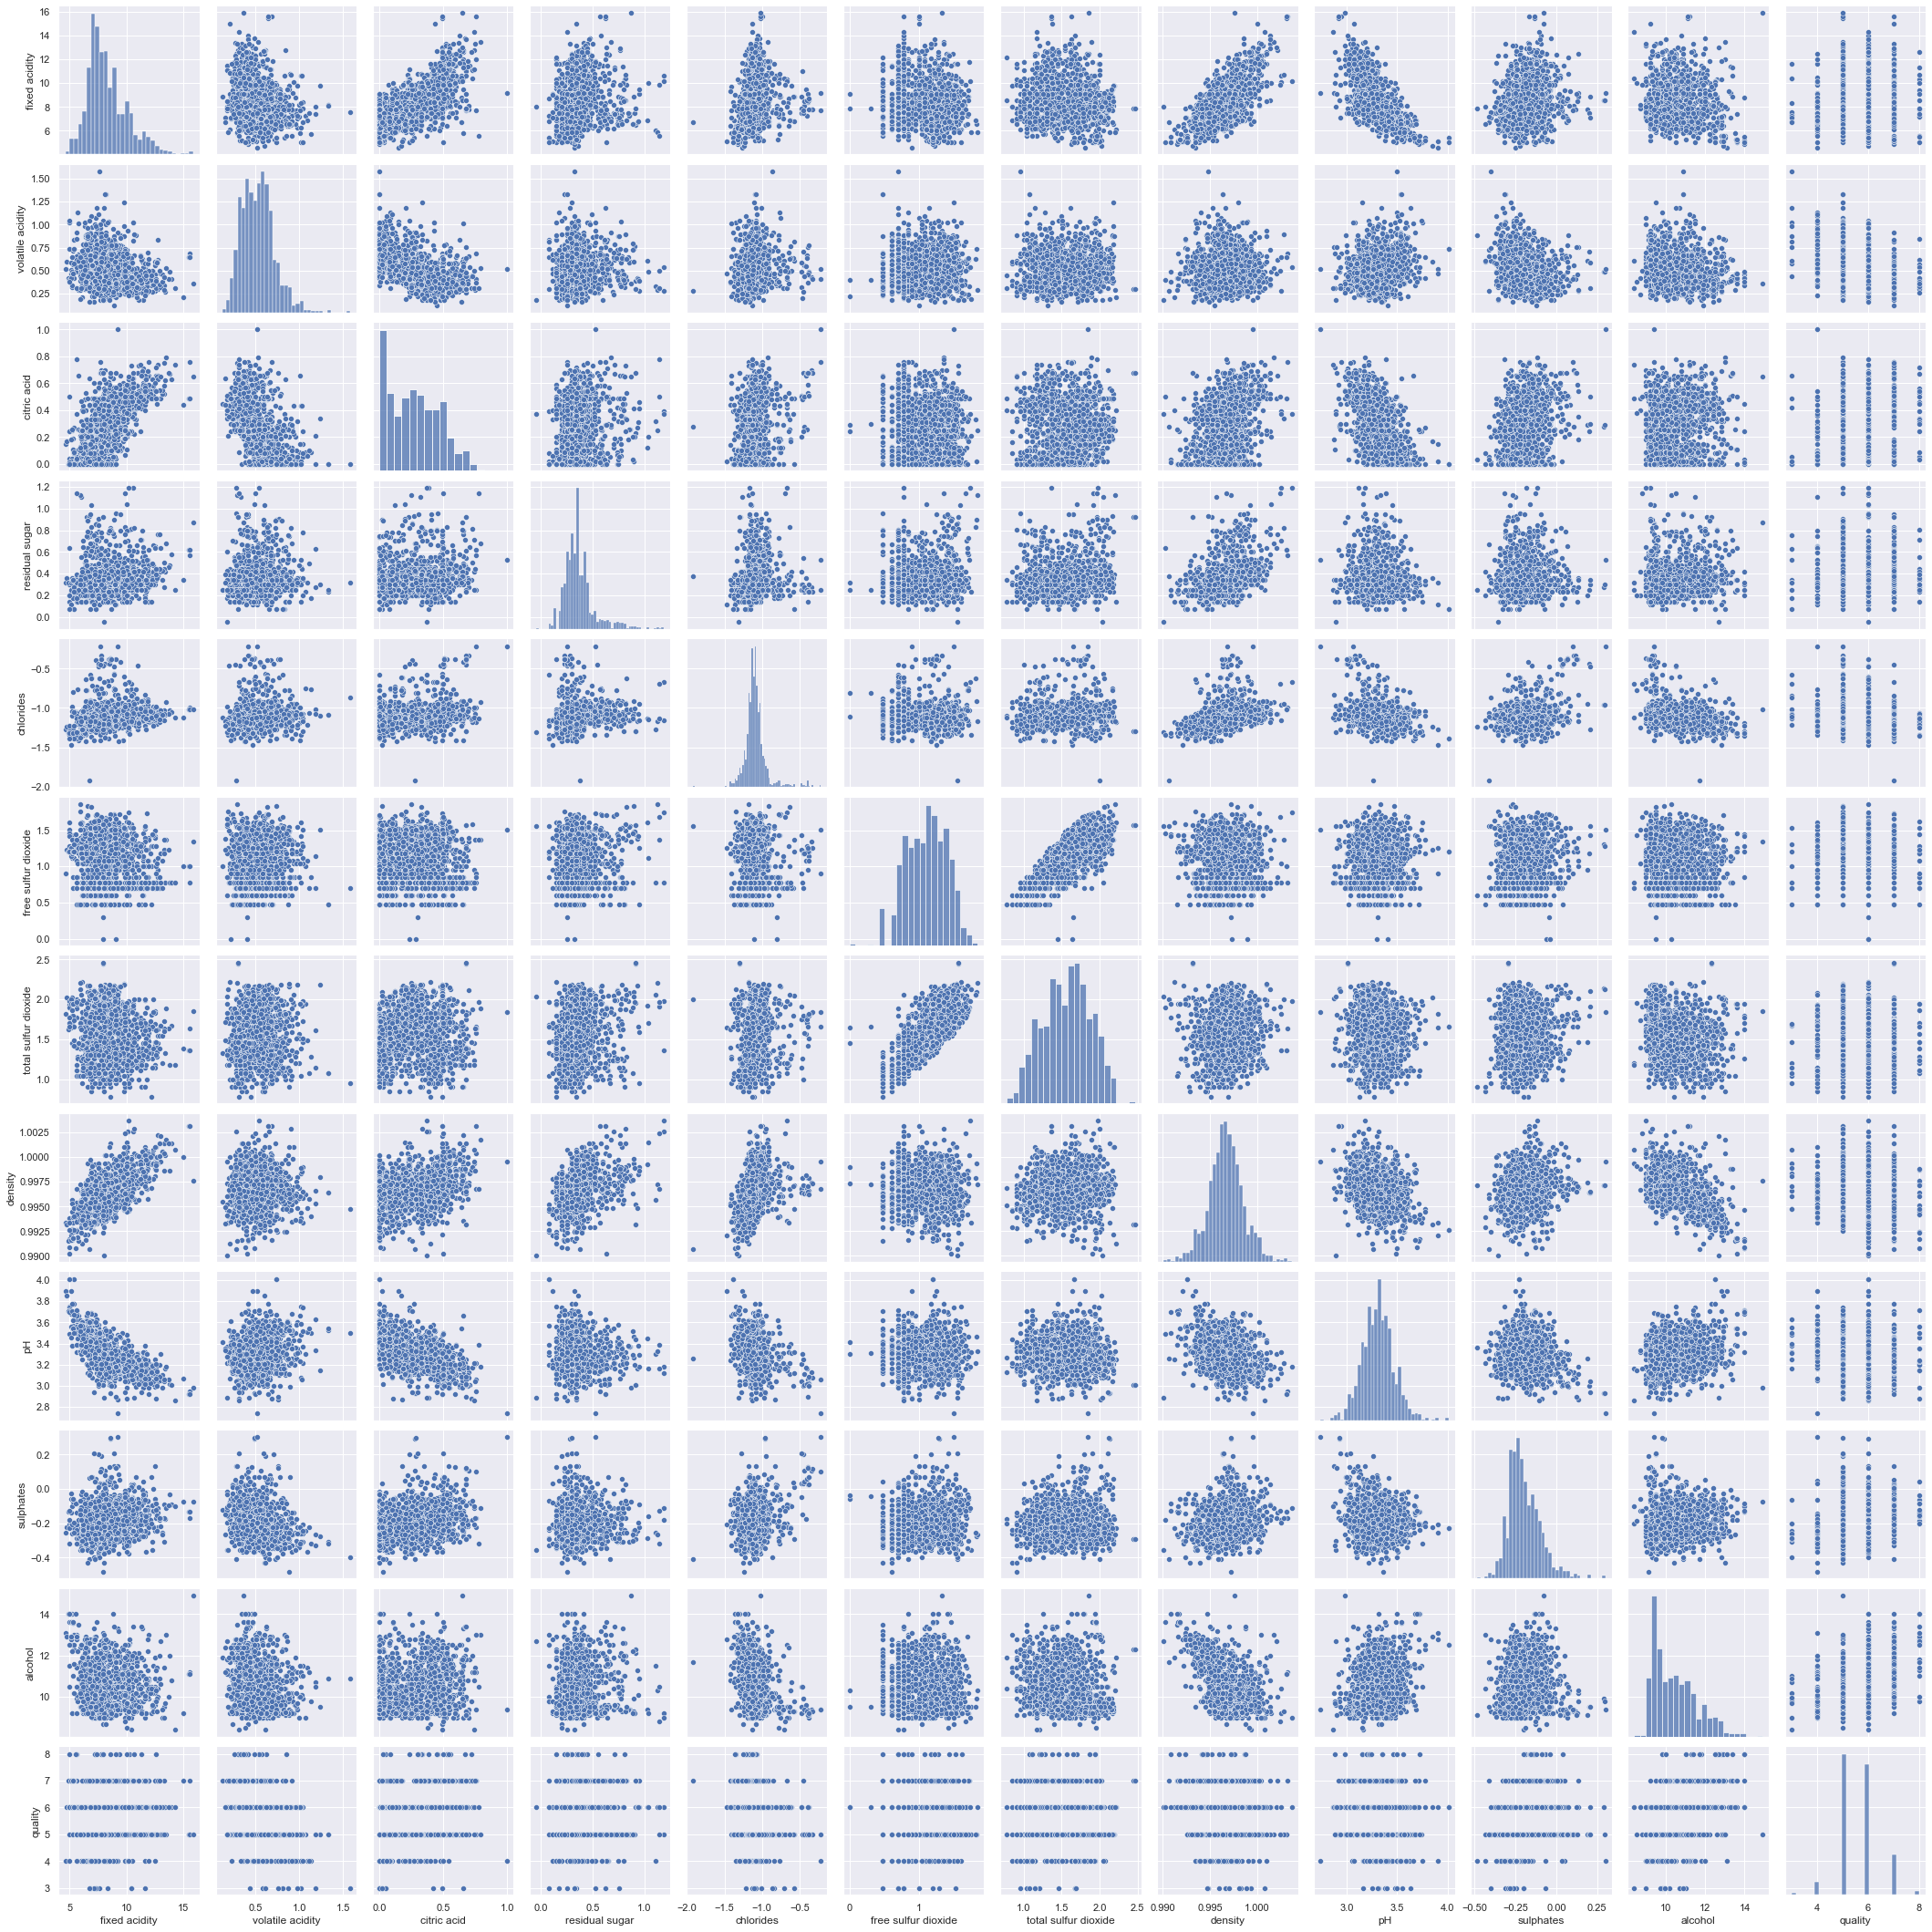

In [77]:
import seaborn as sns

sns.pairplot(new_wine)

From the pairplot, we can observe that fixed acidity and density are positively correlated while fixed acidity and PH are negatively correlated. Citrix acid and volatile acidity are negatively correlated with a value of -0.55.

The attributes quality and alcohol are highly correlated indicating that the quality of wine depends mostly on the type of alcohol.

After applying log transformation, we can observe that the skewness is reduced and the attributes are normally distributed.

# Multiclass to Binary

In [78]:
new_wine['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

From the value_counts(), we can observe that there are only 10 wines with quality level 3 while 577 wines with quality level 5. Hence, we can say that the data is highly imbalanced and in order to obtain better predictions, we have converted this multi class problem to binary by considering the quality levels above 5 as level '1' and remaining quality levels are considered as level '0'.

In [79]:
conditions = [new_wine.quality <= 5, new_wine.quality > 5]
classes = [0, 1]
new_wine['quality'] = np.select(conditions, classes)

(array([640.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 719.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

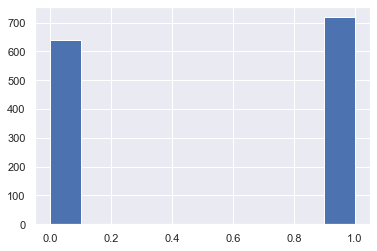

In [80]:
plt.hist(new_wine['quality'])

# Train and Test Split

Now, the pre-processed data set is divided into train, validation and test in the ratio 75:15:10 using train_test_split( )

In [81]:
X = new_wine.loc[:, new_wine.columns!='quality']
Y = new_wine['quality']
train_ratio = 0.75
val_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + val_ratio), random_state=10) 


In [82]:
x_train.shape[0] + x_val.shape[0] + x_test.shape[0]


1359

In [83]:
models = ["LR","KNN", "SVM", "RF"]
precisions = []

# Logistic Regression

Logistic regression is applied on Wine data set using gridsearch method. Using grid search method, we can evaluate various combinations of hyperparameters in the grid. Here, we are applying logistic regression with 10 fold cross validation with L2 penalty for various discrete values of C using the optimizer "lbfgs".

In [84]:
c={'C':[0.01, 0.1, 0.5, 0.75, 1]}
lc_grid = GridSearchCV(estimator=LogisticRegression(solver='lbfgs', max_iter=10000, random_state=10),
            param_grid=c, cv=10, 
            scoring='accuracy') 
lc_grid.fit(x_train, y_train)
print(lc_grid.best_params_)
print(lc_grid.best_score_)


{'C': 0.5}
0.7536788973014948


Logistic regression is fit on the train data set and from the grid search method, we can observe the training accuracy is 75.36%.

In [85]:
lc_pred = lc_grid.predict(x_val)
lc_acc = accuracy_score(y_val, lc_pred)
lc_acc_per = 100 * lc_acc
lc_acc_per

69.6078431372549

Now, the predictions are done on the validation set and we can observe that the accuracy is 69.60%


In [86]:
lc_c_matrix = confusion_matrix(y_val,lc_pred,normalize='all')
print(lc_c_matrix)

[[0.34803922 0.12254902]
 [0.18137255 0.34803922]]


In [87]:
pd.crosstab(y_val,lc_pred,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,71,25
1,37,71


Since, this is a classification problem, accuracy can not be used as right metric to evaluate the model. Hence, we have used confusion matrix to find the precision, true positive rate and true negative rate.

From the confusion matrix, we can observe that 71 low quality (0) wines are correctly classified, while 25 low quality wines are incorrectly classified as high quality (1).

In [88]:
lc_c_report = classification_report(y_val,lc_pred,zero_division='warn',output_dict=True)
df = pd.DataFrame(lc_c_report).transpose()
print(df)

              precision    recall  f1-score     support
0              0.657407  0.739583  0.696078   96.000000
1              0.739583  0.657407  0.696078  108.000000
accuracy       0.696078  0.696078  0.696078    0.696078
macro avg      0.698495  0.698495  0.696078  204.000000
weighted avg   0.700912  0.696078  0.696078  204.000000


classifiaction_report() gives us various statictics like precision, accuracy, recall, f1-score, support for the two classes. Macro avg is the average value of precision/recall/f1-score while weighted avg gives us the weighted averages of precision/recall/f1-score.

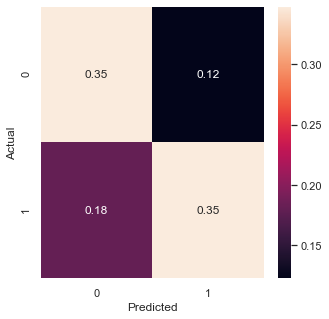

In [89]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lc_c_matrix,annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [90]:
precisions.append(precision_score(y_val,lc_pred))
print(precisions)

[0.7395833333333334]


Precision tells us out of total predicted high quality(quality level 1), how many are actually high quality. Here, the precision is 73.9 indicating that out of total 96 high quality wines, 71 are classified as high quality.

# KNN Algorithm

Now, let us apply K-nearest neghbours to wine data set using grid search method. Here, the hyperparameter is k -value which indicates the number of nearest neighbors. Here, we have considered a range of k values from 1 to 40 with 10 fold cross validation and the model is fit using training data.

In [91]:
k={'n_neighbors':range(1,40)}
knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
            param_grid=k, cv=10, 
            scoring='accuracy') 
knn_grid.fit(x_train, y_train)

print(knn_grid.best_params_)
print(knn_grid.best_score_)

{'n_neighbors': 18}
0.7262279169093381


After performing KNN on train data, we can observe that the best k -value is 18 with train accuracy of 72.6%

In [92]:
knn_pred = knn_grid.predict(x_val)
knn_acc = accuracy_score(y_val, knn_pred)
knn_acc_per = 100 * knn_acc
knn_acc_per

73.0392156862745

Now, the predictions are done on the validation data set and KNN provided an accuracy of 73% on the validation data set.

In [93]:
knn_c_matrix = confusion_matrix(y_val,knn_pred,normalize='all')
print(knn_c_matrix)

[[0.3627451  0.10784314]
 [0.16176471 0.36764706]]


In [94]:
pd.crosstab(y_val,knn_pred,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,74,22
1,33,75


From the confusion matrix, we can observe that 74 low quality (0) wines are correctly classified, while 22 low quality wines are incorrectly classified as high quality (1).

In [95]:
knn_c_report = classification_report(y_val,knn_pred,zero_division='warn',output_dict=True)
df = pd.DataFrame(knn_c_report).transpose()
print(df)

              precision    recall  f1-score     support
0              0.691589  0.770833  0.729064   96.000000
1              0.773196  0.694444  0.731707  108.000000
accuracy       0.730392  0.730392  0.730392    0.730392
macro avg      0.732392  0.732639  0.730386  204.000000
weighted avg   0.734793  0.730392  0.730463  204.000000


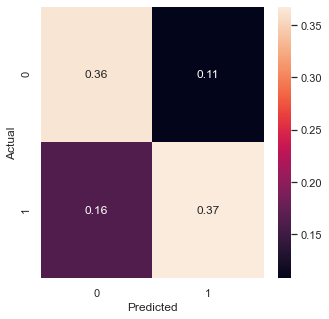

In [96]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knn_c_matrix,annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [97]:
precisions.append(precision_score(y_val,knn_pred))
print(precisions)

[0.7395833333333334, 0.7731958762886598]


Precision tells us out of total predicted high quality(quality level 1), how many are actually high quality. Here, KNN provided a precision of 77.3% indicating that out of total 97 high quality wines, 75 are classified as high quality.

# SVM

Now, Support vector machine (SVM) is applied on Wine data set with linear kernel and hyperparameters are tuned using gridsearch method. C is the penalty term which represents misclassifiaction or error term and it is taken in the range 0.1 to 1000.

In [98]:
svm_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
 
svclassifier = GridSearchCV(SVC(), svm_grid, refit = True, verbose = 3)
svclassifier.fit(x_train, y_train)

print(svclassifier.best_params_)
print(svclassifier.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.730, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.755, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.745, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.721, total=   0.0s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.719, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.721, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] ..... C=0.1, gamma=0.1, kernel=linear, score=0.719, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.730, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.755, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.745, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.721, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .... C=0.1, gamma=0.01, kernel=linear, score=0.719, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] .... C=10, gamma=0.001, kernel=linear, score=0.755, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.740, total=   0.1s
[CV] C=10, gamma=0.001, kernel=linear ................................
[CV] .... C=10, gamma=0.001, kernel=linear, score=0.704, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.716, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.775, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.755, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] ... C=10, gamma=0.0001, kernel=linear, score=0.740, total=   0.1s
[CV] C=10, gamma=0.0001, kernel=linear ...............................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.3min finished


{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
SVC(C=1000, gamma=1, kernel='linear')


SVM is applied on the train data set and we can observe that the best C value is 1000 with gamma value 1.

In [99]:
svm_pred = svclassifier.predict(x_val)
svm_accuracy = accuracy_score(y_val,svm_pred)*100
svm_accuracy

69.6078431372549

Now, the predictions are made on the validation set and we can observe that the accuracy is 69.60%

In [100]:
svm_c_matrix = confusion_matrix(y_val,svm_pred,normalize='all')
print(svm_c_matrix)

[[0.35294118 0.11764706]
 [0.18627451 0.34313725]]


In [101]:
pd.crosstab(y_val,svm_pred,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,72,24
1,38,70


From the confusion matrix, we can observe that 70 high quality (1) wines are correctly classified, while 24 low quality wines are incorrectly classified as high quality (1).

In [102]:
svm_c_report = classification_report(y_val,svm_pred,zero_division='warn',output_dict=True)
df = pd.DataFrame(svm_c_report).transpose()
print(df)

              precision    recall  f1-score     support
0              0.654545  0.750000  0.699029   96.000000
1              0.744681  0.648148  0.693069  108.000000
accuracy       0.696078  0.696078  0.696078    0.696078
macro avg      0.699613  0.699074  0.696049  204.000000
weighted avg   0.702264  0.696078  0.695874  204.000000


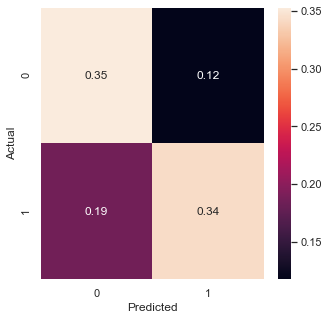

In [103]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm_c_matrix,annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [104]:
precisions.append(precision_score(y_val,svm_pred))
print(precisions)

[0.7395833333333334, 0.7731958762886598, 0.7446808510638298]


Precision tells us out of total predicted high quality(quality level 1), how many are actually high quality. Here, KNN provided a precision of 74.4% indicating that out of total 94 high quality wines, 70 are classified as high quality.

# Random Forest

Now, let us apply an ensemble method Random Forest to wine data set. First, the data is scaled using StandardScaler().

In [105]:
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
X_val= sc.transform(x_val)

Random Forest is fit on train data using grid search method using gini index and entropy to decide the best split. The maximum tree depth is taken in the range 4 to 8 using 5 fold cross validation.

In [106]:
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
random_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [107]:
rfc_grid = GridSearchCV(estimator=classifier, param_grid=random_grid, cv= 5)
rfc_grid.fit(X_train, y_train)
rfc_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

Random Forest is applied on train data set and the best parameters 'criterion':'entropy','max_depth': 8,'max_features': 'auto', 'n_estimators': 200 are obtained after model training.

In [108]:
rf_pred = rfc_grid.predict(X_val)
rf_accuracy = accuracy_score(y_val,rf_pred)*100
rf_accuracy

77.45098039215686

Now, the predictions are made on the validation data set and we can observe that the accuracy is 77.4%

In [109]:
rf_c_matrix = confusion_matrix(y_val,rf_pred,normalize='all')
print(rf_c_matrix)
pd.crosstab(y_val,rf_pred,rownames=['Actual'], colnames=['Predicted'])

[[0.36764706 0.10294118]
 [0.12254902 0.40686275]]


Predicted,0,1
Actual,,
0,75,21
1,25,83


From the confusion matrix, we can observe that 83 high quality (1) wines are correctly classified, while 25 high quality wines are incorrectly classified as low quality (0).

In [110]:
rf_c_report = classification_report(y_val,rf_pred,zero_division='warn',output_dict=True)
df = pd.DataFrame(rf_c_report).transpose()
print(df)

              precision    recall  f1-score    support
0              0.750000  0.781250  0.765306   96.00000
1              0.798077  0.768519  0.783019  108.00000
accuracy       0.774510  0.774510  0.774510    0.77451
macro avg      0.774038  0.774884  0.774162  204.00000
weighted avg   0.775452  0.774510  0.774683  204.00000


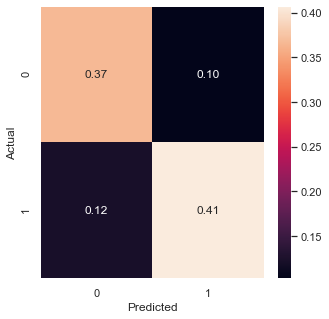

In [111]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_c_matrix,annot=True, fmt='.2f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [115]:
precisions.append(precision_score(y_val,rf_pred))
print(precisions)

[0.7395833333333334, 0.7731958762886598, 0.7446808510638298, 0.7980769230769231]


Precision tells us out of total predicted high quality(quality level 1), how many are actually high quality. Here, KNN provided a precision of 79.8% indicating that out of total 104 high quality wines, 83 are classified as high quality.

# Performance Comparison 

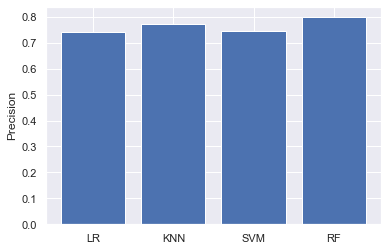

In [116]:
plt.bar(range(len(models)), precisions, tick_label=models)
plt.ylabel("Precision")
plt.show()

By comparing the precision from all the 4 models, we can observe that the precision is high for Random Forest which is 79.8%. Hence, we can say that best predictions are obtained using Random Forest algorithm since it is an ensemble method which makes predictions based on multiple decision trees by using bootstrapping (random sampling with replacement). 

Now, let us make final predictions on test data.

# Test data Evaluation

In [118]:
rf_pred = rfc_grid.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_pred)*100
rf_accuracy

74.26470588235294

In [119]:
rf_precision= precision_score(y_test,rf_pred)

In [120]:
rf_precision

0.7246376811594203

We can observe that the accuracy is 74.26% while precision is 72.46% when predictions are made on test data using Random Forest